In [1]:
import pandas as pd
import numpy as np
import time
import importlib

import matplotlib.pyplot as plt
import seaborn as sns

import rank_eval_pipeline as rep
import eval_algos
import rank_algos

In [2]:
# Load data
df = pd.read_csv('data/full_data.csv')
df

,info_click_valid,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99
0,1,3282490636,3723861767,592628169,2093237750,3617548381,2965721776,3543218850,1072184752,1418147852,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1,1,2736633149,3188050045,3599848058,2300041243,3503728323,1531702445,3543218850,2634671414,2266512440,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
2,1,1067402948,108565582,2502341442,3474641266,3503728323,1531702445,3543218850,4108477053,870407079,...,147472623,3508206064,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
3,1,3634365896,2567512859,753387811,2124887610,3503728323,2965721776,3543218850,4108477053,3981694603,...,147472623,3508206064,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
4,1,3282490636,1241498584,99521842,868270843,3503728323,1531702445,3543218850,4108477053,3377404711,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572873,0,719059834,108565582,1622567635,265581914,3503728323,2965721776,3543218850,3153333045,1315254508,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,680663615,3956900602
1572874,1,3855058850,3117534041,148578446,1880637442,3617548381,1531702445,3543218850,1072184752,603519084,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1572875,1,59570122,2236475198,3022312119,2120140848,3503728323,1531702445,3543218850,3371001158,2147952612,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1572876,1,1439395589,2819363971,12381797,4195009840,3503728323,2965721776,3543218850,2265512916,2246488302,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631


In [3]:
rank_algos_list = [rank_algos.mutual_info_score, rank_algos.ReliefF_score, rank_algos.chi2_score, rank_algos.xgboost_score, rank_algos.random_forest_score, rank_algos.anova_f_score, rank_algos.pearson_correlation_score]

res_dict = {}
ranks_dict = {}

for rank_algo in rank_algos_list:
    start_time = time.time()
    evaluator = rep.RankEval(df, rank_algo, subsampling_proportion=0.01, seed=1)
    results = evaluator.get_eval_res()
    end_time = time.time()

    print(f'Ranking algorithm: {rank_algo.__name__} took {end_time - start_time} seconds to run')
    res_dict[rank_algo.__name__] = results
    ranks_dict[rank_algo.__name__] = evaluator.get_ranking()



Ranking algorithm: mutual_info_score took 4.595898866653442 seconds to run
Ranking algorithm: ReliefF_score took 6.070742607116699 seconds to run
Ranking algorithm: chi2_score took 0.22800016403198242 seconds to run
Ranking algorithm: xgboost_score took 0.36100006103515625 seconds to run
Ranking algorithm: random_forest_score took 1.325002670288086 seconds to run
Ranking algorithm: anova_f_score took 0.16300082206726074 seconds to run


A:\Prog_FaksDataScience\Project\DS_Project_Feature_Selection\src\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [70 73 74 75 76 77 78 79 80 92 93 94 95 96 97 98 99] are constant.


Ranking algorithm: pearson_correlation_score took 0.18699955940246582 seconds to run


In [4]:
ranks_dict['mutual_info_score'][:10]

Index(['feature99', 'feature98', 'feature84', 'feature85', 'feature87',
       'feature86', 'feature89', 'feature88', 'feature83', 'feature82'],
      dtype='object')

In [5]:
ranks_dict['ReliefF_score'][:10]

Index(['feature98', 'feature99', 'feature70', 'feature73', 'feature74',
       'feature75', 'feature76', 'feature77', 'feature78', 'feature79'],
      dtype='object')

In [6]:
ranks_dict['chi2_score'][:10]

Index(['feature50', 'feature49', 'feature2', 'feature59', 'feature85',
       'feature87', 'feature88', 'feature89', 'feature86', 'feature84'],
      dtype='object')

In [7]:
# feature99 at the bottom!!!
ranks_dict['xgboost_score']

Index(['feature98', 'feature86', 'feature81', 'feature0', 'feature49',
       'feature22', 'feature82', 'feature1', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature2', 'feature20',
       'feature21', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature3', 'feature30',
       'feature31', 'feature32', 'feature33', 'feature34', 'feature35',
       'feature36', 'feature37', 'feature38', 'feature39', 'feature4',
       'feature40', 'feature41', 'feature42', 'feature43', 'feature44',
       'feature45', 'feature46', 'feature47', 'feature48', 'feature5',
       'feature50', 'feature51', 'feature52', 'feature53', 'feature54',
       'feature55', 'feature56', 'feature57', 'feature58', 'feature59',
       'feature6', 'feature60', 'feature61', 'feature62', 'feature63',
       'feature64', 'feature65', 'feature66', 'feature67', 'feature68',

In [8]:
ranks_dict['random_forest_score'][:10]

Index(['feature98', 'feature99', 'feature86', 'feature88', 'feature85',
       'feature89', 'feature87', 'feature84', 'feature83', 'feature23'],
      dtype='object')

In [9]:
ranks_dict['anova_f_score'][:10]

Index(['feature98', 'feature99', 'feature86', 'feature85', 'feature87',
       'feature88', 'feature89', 'feature84', 'feature83', 'feature82'],
      dtype='object')

In [10]:
ranks_dict['pearson_correlation_score'][:10]

Index(['feature98', 'feature99', 'feature86', 'feature85', 'feature87',
       'feature88', 'feature89', 'feature84', 'feature83', 'feature82'],
      dtype='object')

In [11]:
singles_dict = {}
for rank_algo in rank_algos_list:
    singles_dict[rank_algo.__name__] = res_dict[rank_algo.__name__][0][0]

first_gen_dict = {}
for rank_algo in rank_algos_list:
    first_gen_dict[rank_algo.__name__] = res_dict[rank_algo.__name__][1][0]

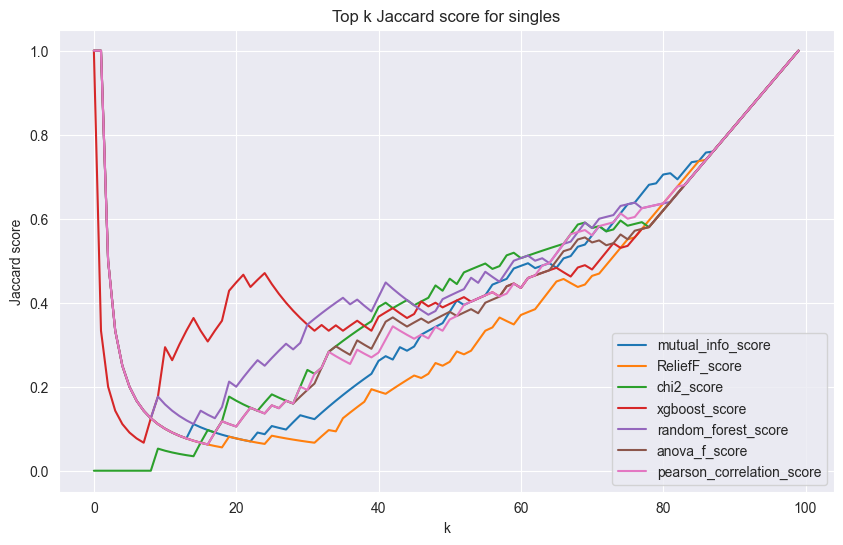

In [12]:
# plot results with k on x-axis
fig, ax = plt.subplots(figsize=(10, 6))

for key in singles_dict:
    ax.plot(singles_dict[key], label=key)

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard score for singles')
ax.legend()
plt.show()

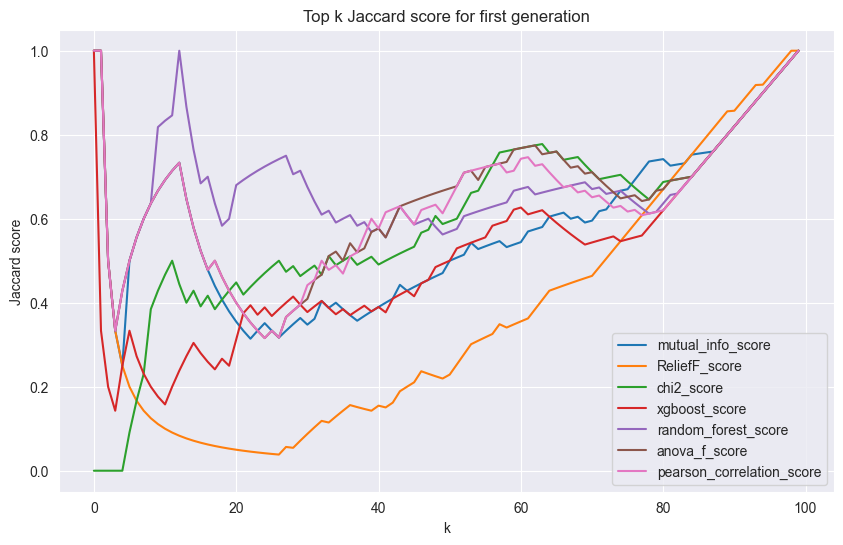

In [13]:
# plot results with k on x-axis
fig, ax = plt.subplots(figsize=(10, 6))

for key in first_gen_dict:
    ax.plot(first_gen_dict[key], label=key)

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard score for first generation')
ax.legend()
plt.show()


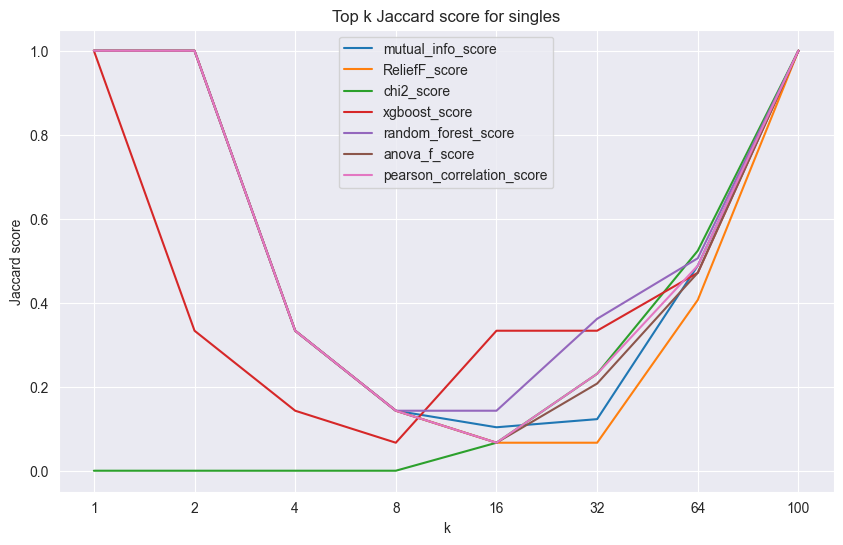

In [14]:
# plot only for k = 1, 2, 4, 8, 16, 32, 64, 100

fig, ax = plt.subplots(figsize=(10, 6))

for key in singles_dict:
    # take indices 0, 1, 3, 7, 15, 31, 63, 99
    ax.plot([singles_dict[key][0], singles_dict[key][1], singles_dict[key][3], singles_dict[key][7], singles_dict[key][15], singles_dict[key][31], singles_dict[key][63], singles_dict[key][99]], label=key)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64, 100])

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard score for singles')
ax.legend()
plt.show()

Remove some features

In [15]:
bad_features = []

one_unique_val_features = ["feature70", "feature92", "feature93", "feature94", "feature95", "feature96", "feature97"]
bad_features.extend(one_unique_val_features)

In [16]:
evaluator = rep.RankEval(df, rank_algos.mutual_info_score, subsampling_proportion=0.1, seed=1, features_to_remove=bad_features)
results = evaluator.get_eval_res()
ranking = evaluator.get_ranking()

ranking

Index(['feature99', 'feature98', 'feature87', 'feature83', 'feature86',
       'feature85', 'feature84', 'feature88', 'feature89', 'feature82',
       'feature81', 'feature65', 'feature56', 'feature45', 'feature13',
       'feature23', 'feature31', 'feature5', 'feature32', 'feature17',
       'feature91', 'feature48', 'feature90', 'feature22', 'feature58',
       'feature14', 'feature57', 'feature61', 'feature33', 'feature39',
       'feature60', 'feature37', 'feature40', 'feature2', 'feature15',
       'feature71', 'feature0', 'feature50', 'feature9', 'feature59',
       'feature69', 'feature16', 'feature42', 'feature34', 'feature10',
       'feature68', 'feature41', 'feature27', 'feature30', 'feature36',
       'feature8', 'feature44', 'feature24', 'feature26', 'feature1',
       'feature7', 'feature67', 'feature49', 'feature11', 'feature19',
       'feature4', 'feature28', 'feature18', 'feature63', 'feature35',
       'feature53', 'feature12', 'feature55', 'feature62', 'feature6',
 

In [17]:
gt = eval_algos.get_ground_truths_ordered()
gt_single = gt[0].index
gt_first_gen = gt[1].index

In [18]:
importlib.reload(eval_algos)

# get jaccard scores for top k features (k = 2, 4, 8, 16, 32, 64, 100)
singles_jaccard_scores = []
first_gen_jaccard_scores = []

for k in [2, 4, 8, 16, 32, 64, 100]:
    singles_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_single[:k], k))
    first_gen_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_first_gen[:k], k))

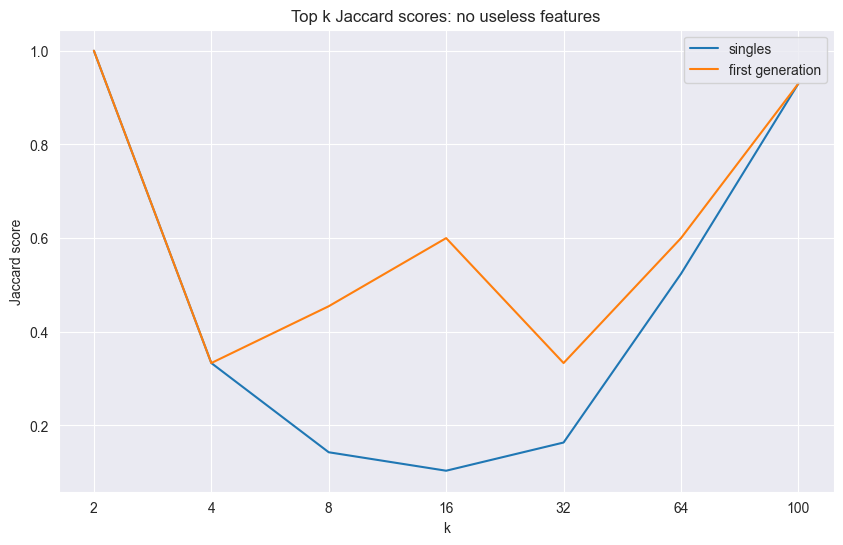

In [19]:
# plot results with k on x-axis
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(singles_jaccard_scores, label='singles')
ax.plot(first_gen_jaccard_scores, label='first generation')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels([2, 4, 8, 16, 32, 64, 100])

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard scores: no useless features')
ax.legend()
plt.show()

In [20]:
high_cardinality_features = ["feature1", "feature2", "feature3", "feature8", "feature9", "feature10", "feature21", "feature33", "feature36", "feature47", "feature49", "feature50", "feature51", "feature52", "feature53", "feature54", "feature59", "feature60", "feature66", "feature71"]
bad_features.extend(high_cardinality_features)

In [21]:
evaluator = rep.RankEval(df, rank_algos.mutual_info_score, subsampling_proportion=0.1, seed=1, features_to_remove=bad_features)
results = evaluator.get_eval_res()
ranking = evaluator.get_ranking()

ranking

Index(['feature98', 'feature99', 'feature85', 'feature87', 'feature84',
       'feature89', 'feature88', 'feature86', 'feature82', 'feature83',
       'feature81', 'feature65', 'feature56', 'feature45', 'feature13',
       'feature23', 'feature31', 'feature90', 'feature91', 'feature14',
       'feature5', 'feature17', 'feature32', 'feature58', 'feature22',
       'feature48', 'feature61', 'feature57', 'feature39', 'feature40',
       'feature27', 'feature44', 'feature63', 'feature62', 'feature34',
       'feature0', 'feature12', 'feature15', 'feature37', 'feature77',
       'feature11', 'feature7', 'feature28', 'feature69', 'feature30',
       'feature68', 'feature38', 'feature25', 'feature4', 'feature41',
       'feature67', 'feature29', 'feature20', 'feature16', 'feature24',
       'feature42', 'feature26', 'feature55', 'feature73', 'feature72',
       'feature74', 'feature64', 'feature75', 'feature35', 'feature76',
       'feature6', 'feature43', 'feature79', 'feature18', 'feature19

In [22]:
singles_jaccard_scores = []
first_gen_jaccard_scores = []

for k in [2, 4, 8, 16, 32, 64, 100]:
    singles_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_single[:k], k))
    first_gen_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_first_gen[:k], k))

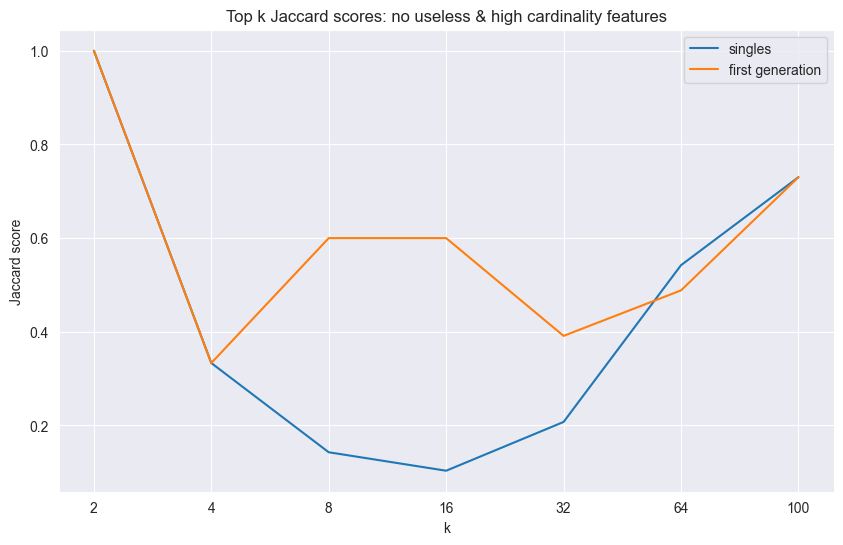

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(singles_jaccard_scores, label='singles')
ax.plot(first_gen_jaccard_scores, label='first generation')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels([2, 4, 8, 16, 32, 64, 100])

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard scores: no useless & high cardinality features')
ax.legend()
plt.show()

In [24]:
sparse_features = ["feature8", "feature28", "feature29", "feature56", "feature68", "feature70", "feature71", "feature72", "feature73", "feature74", "feature75", "feature76", "feature77", "feature79", "feature92", "feature93", "feature94", "feature95", "feature96", "feature97"]
bad_features.extend(sparse_features)

In [25]:
evaluator = rep.RankEval(df, rank_algos.mutual_info_score, subsampling_proportion=0.1, seed=1, features_to_remove=bad_features)
results = evaluator.get_eval_res()
ranking = evaluator.get_ranking()

ranking

Index(['feature99', 'feature98', 'feature87', 'feature86', 'feature85',
       'feature88', 'feature82', 'feature84', 'feature89', 'feature83',
       'feature81', 'feature65', 'feature45', 'feature13', 'feature31',
       'feature23', 'feature5', 'feature32', 'feature91', 'feature90',
       'feature14', 'feature17', 'feature22', 'feature48', 'feature57',
       'feature58', 'feature63', 'feature15', 'feature39', 'feature0',
       'feature44', 'feature61', 'feature37', 'feature40', 'feature34',
       'feature30', 'feature12', 'feature7', 'feature67', 'feature26',
       'feature27', 'feature43', 'feature55', 'feature42', 'feature62',
       'feature19', 'feature69', 'feature11', 'feature38', 'feature24',
       'feature16', 'feature41', 'feature20', 'feature18', 'feature80',
       'feature4', 'feature35', 'feature46', 'feature64', 'feature25',
       'feature6', 'feature78'],
      dtype='object')

In [26]:
singles_jaccard_scores = []
first_gen_jaccard_scores = []

for k in [2, 4, 8, 16, 32, 64, 100]:
    singles_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_single[:k], k))
    first_gen_jaccard_scores.append(eval_algos.jaccard_k(ranking[:k], gt_first_gen[:k], k))

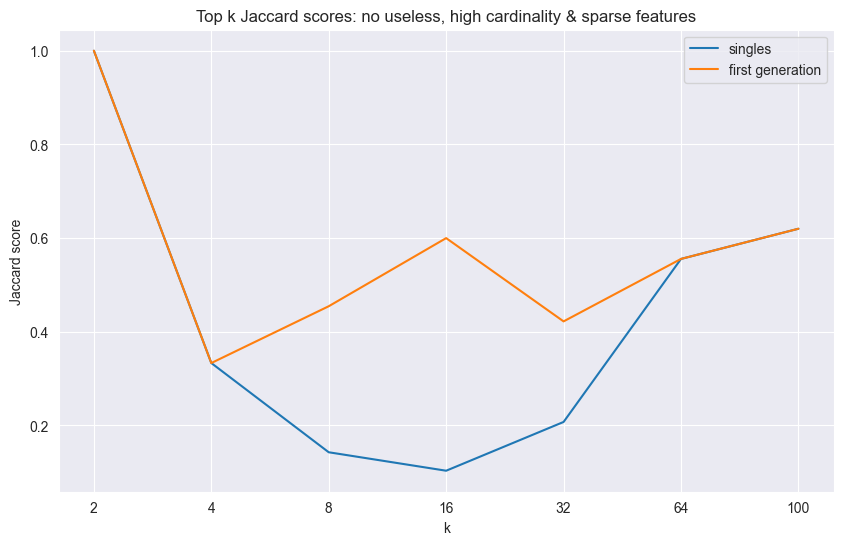

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(singles_jaccard_scores, label='singles')
ax.plot(first_gen_jaccard_scores, label='first generation')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels([2, 4, 8, 16, 32, 64, 100])

ax.set_xlabel('k')
ax.set_ylabel('Jaccard score')
ax.set_title('Top k Jaccard scores: no useless, high cardinality & sparse features')
ax.legend()
plt.show()